In [1]:
#Importing all the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the Machine Learning packages
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [110]:
#Loading the dataset named train
df=pd.read_csv(r"C:\Users\Jiss Mathew\Desktop\ICT-DSA-Course_Jenis_2023\17-ICT Python Programs\Exit Test\train.csv")

In [111]:
#Checking for the first few rows
df.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [112]:
#Checking the original column names
df.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

In [38]:
#checking the dimension of the dataset
df.shape

(13994, 30)

In [39]:
#Checking the features and its datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [40]:
#Checking for null values
df.isnull().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [41]:
#Here we are spliting the data to numerical & Categorical data
#Numerical Data
numerical_data=df.select_dtypes(include='number')
#we are appending the numerical_data to list
numerical_features=numerical_data.columns.tolist()
print(len(numerical_features))# to check the number of numerical features
print(numerical_features)#print the list of numerical features

21
['age', 'ball_controlling_skills', 'body_reflexes', 'body_balance', 'jumping_skills', 'penalties_conversion_rate', 'mental_strength', 'goalkeeping_skills', 'defending_skills', 'passing_skills', 'dribbling_skills', 'shot_accuracy', 'body_strength_stamina', 'max_running_speed', 'behaviour_rating', 'matches_played', 'fitness_rating', 'trophies_won', 'years_of_experience', 'no_of_disqualifications', 'selection']


In [42]:
#Categorical Data
categorical_data=df.select_dtypes(include='object')
#we are appending the categorical_data to list
categorical_features=categorical_data.columns.tolist()
print(len(categorical_features))# to check the number of numerical features
print(categorical_features)#print the list of numerical features

9
['player_id', 'name', 'gender', 'country', 'height', 'weight', 'strong_foot', 'dedication_level', 'coaching']


In [43]:
#Descriptive Analysis of Numerical data
numerical_data.describe

<bound method NDFrame.describe of        age  ball_controlling_skills  body_reflexes  body_balance  \
0       23                     77.0           58.0          47.0   
1       18                     54.0           69.0          70.0   
2       16                     34.0           43.0          45.0   
3       27                     79.0           73.0          76.0   
4       19                     47.0           61.0          74.0   
...    ...                      ...            ...           ...   
13989   20                     60.0           48.0          62.0   
13990   18                     53.0           68.0          59.0   
13991   17                     56.0           73.0          62.0   
13992   20                     71.0           69.0          70.0   
13993   16                     53.0           59.0          67.0   

       jumping_skills  penalties_conversion_rate  mental_strength  \
0                59.0                       41.0             73.0   
1          

In [44]:
#Descriptive Analysis of Categorical data
categorical_data.describe(include='object')

,player_id,name,gender,country,height,weight,strong_foot,dedication_level,coaching
count,13994,13994,13975,13994,13994,13577,13442,13994,13869
unique,13994,13994,2,163,31,88,4,3,4
top,PLID_4964,Keva Horan,M,England,6'0,165lbs,Right,Medium,Academy
freq,1,1,6992,1157,2251,1106,8359,9704,9390


# Histogram

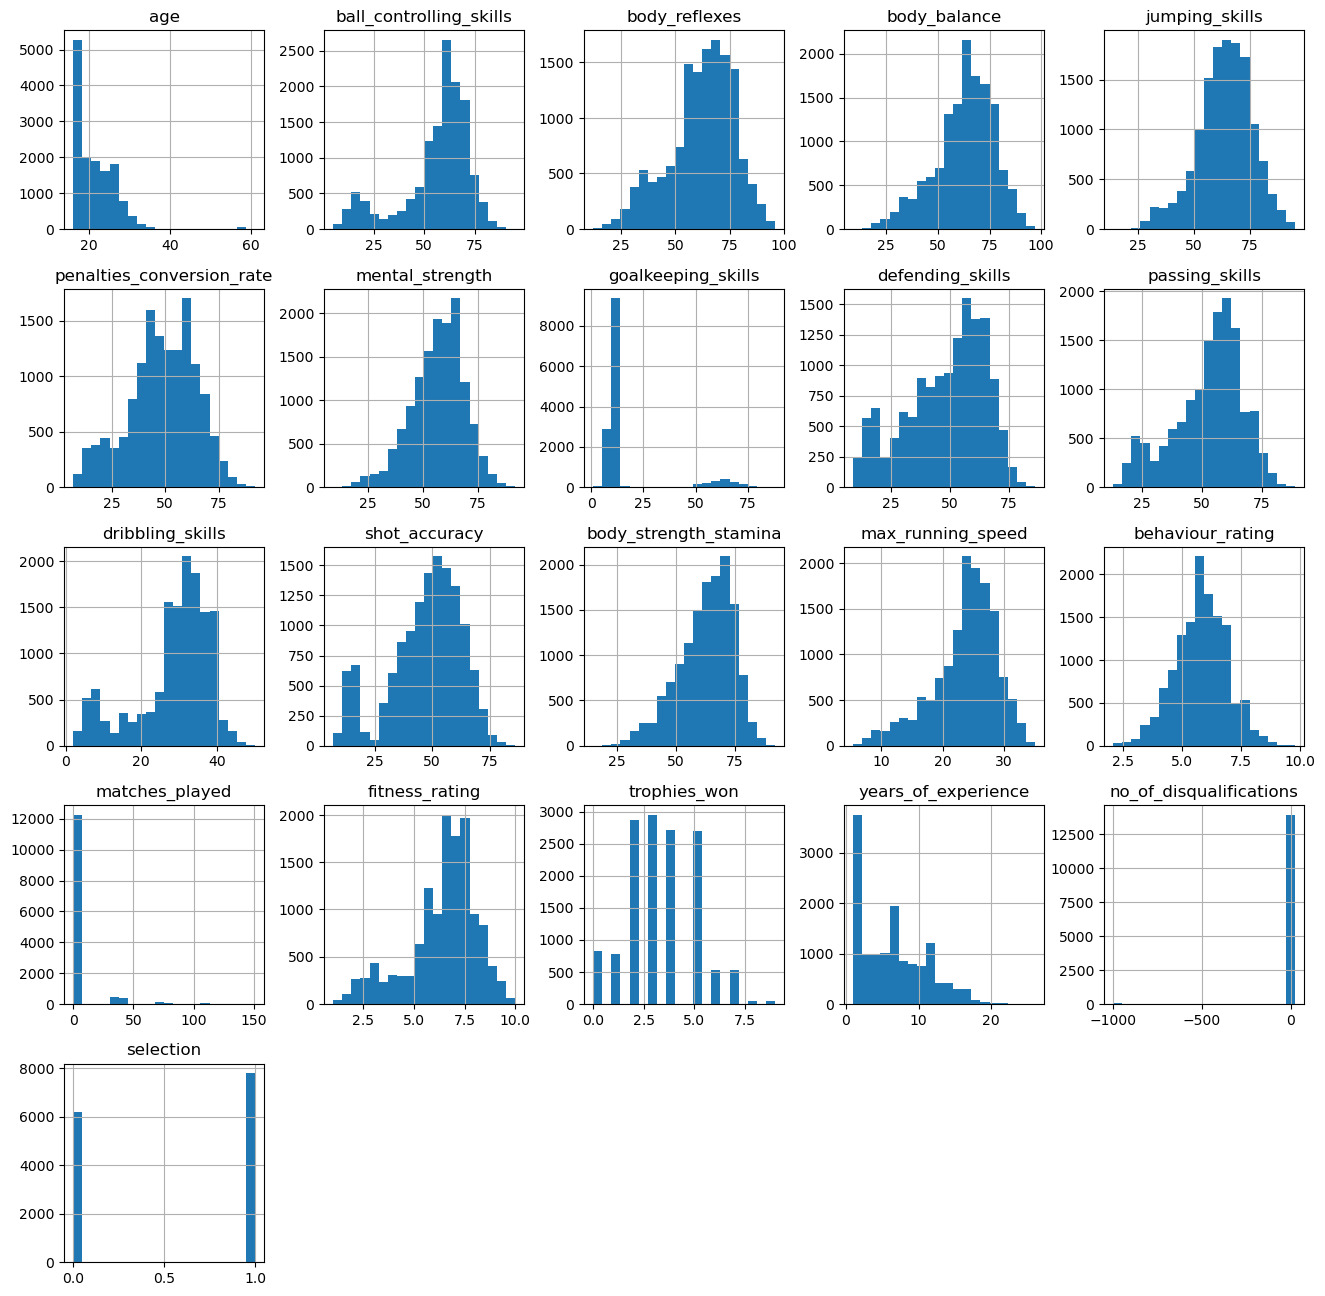

In [45]:
#Here we are plotting histograms of numerical data to understand the different features
numerical_data.hist(figsize=(16,16),bins=20)
plt.show()

# Correlation Analysis

In [46]:
#checking for the correlation analysis
from pandas import set_option
set_option('display.precision',3)
correlation=df.corr(method='pearson')
correlation

C:\Users\Jiss Mathew\AppData\Local\Temp\ipykernel_5696\3045758634.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr(method='pearson')


,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
age,1.000,0.083,-0.009,-0.058,0.144,0.124,0.315,0.077,0.157,0.154,...,0.149,0.201,-0.131,0.374,0.211,0.079,0.031,0.841,-0.011,-0.162
ball_controlling_skills,0.083,1.000,0.702,0.604,0.205,0.770,0.698,-0.788,0.600,0.897,...,0.897,0.552,0.685,0.457,0.213,0.724,0.272,0.092,-0.008,0.266
body_reflexes,-0.009,0.702,1.000,0.761,0.226,0.564,0.450,-0.537,0.297,0.672,...,0.657,0.276,0.798,0.284,0.088,0.572,0.236,-0.021,-0.016,0.163
body_balance,-0.058,0.604,0.761,1.000,0.201,0.486,0.338,-0.520,0.289,0.584,...,0.542,0.129,0.687,0.159,0.041,0.483,0.198,-0.075,-0.013,0.101
jumping_skills,0.144,0.205,0.226,0.201,1.000,0.136,0.264,-0.205,0.326,0.158,...,0.187,0.404,0.245,0.267,0.113,0.363,0.057,0.156,-0.011,0.085
penalties_conversion_rate,0.124,0.770,0.564,0.486,0.136,1.000,0.569,-0.632,0.306,0.691,...,0.873,0.392,0.543,0.354,0.213,0.519,0.248,0.142,-0.012,0.177
mental_strength,0.315,0.698,0.450,0.338,0.264,0.569,1.000,-0.424,0.522,0.712,...,0.685,0.529,0.384,0.665,0.363,0.544,0.228,0.368,-0.002,0.319
goalkeeping_skills,0.077,-0.788,-0.537,-0.520,-0.205,-0.632,-0.424,1.000,-0.660,-0.661,...,-0.718,-0.546,-0.626,-0.079,-0.005,-0.704,-0.177,0.098,0.014,-0.047
defending_skills,0.157,0.600,0.297,0.289,0.326,0.306,0.522,-0.660,1.000,0.637,...,0.465,0.680,0.335,0.390,0.157,0.700,0.100,0.178,0.001,0.154
passing_skills,0.154,0.897,0.672,0.584,0.158,0.691,0.712,-0.661,0.637,1.000,...,0.849,0.501,0.595,0.513,0.255,0.686,0.265,0.179,-0.008,0.258


C:\Users\Jiss Mathew\AppData\Local\Temp\ipykernel_5696\490515563.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),ax=ax,annot=True)


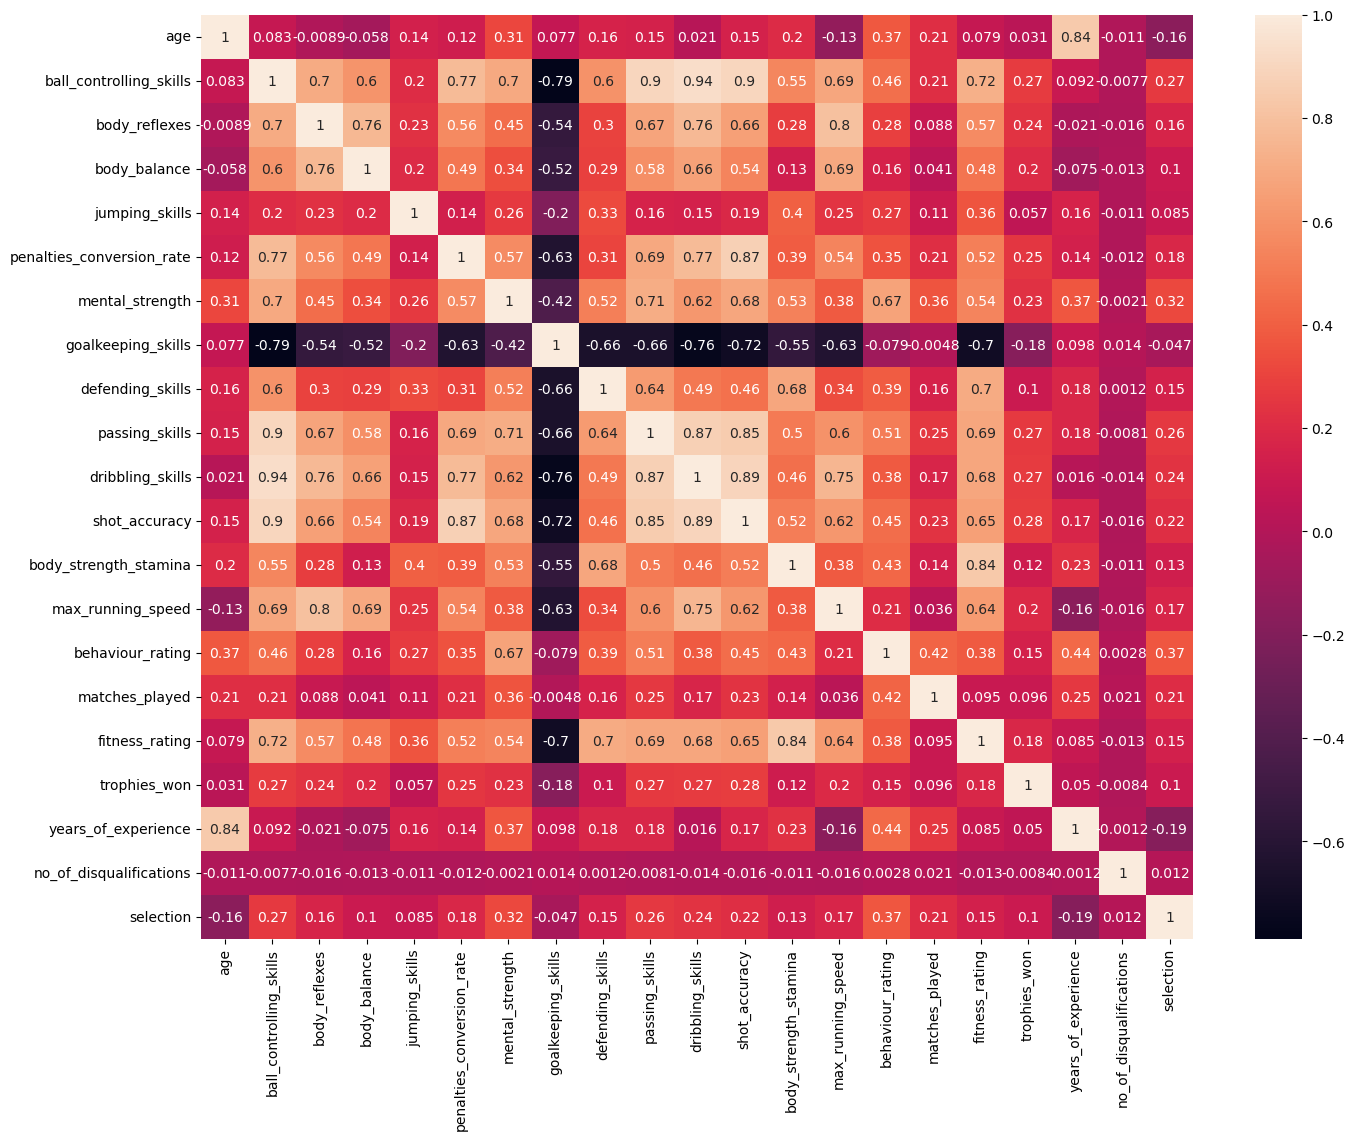

In [47]:
#Generating a heatmap to find the correlation between various features
fig,ax=plt.subplots(figsize=(16,12))
sns.heatmap(df.corr(),ax=ax,annot=True)
plt.show()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <A

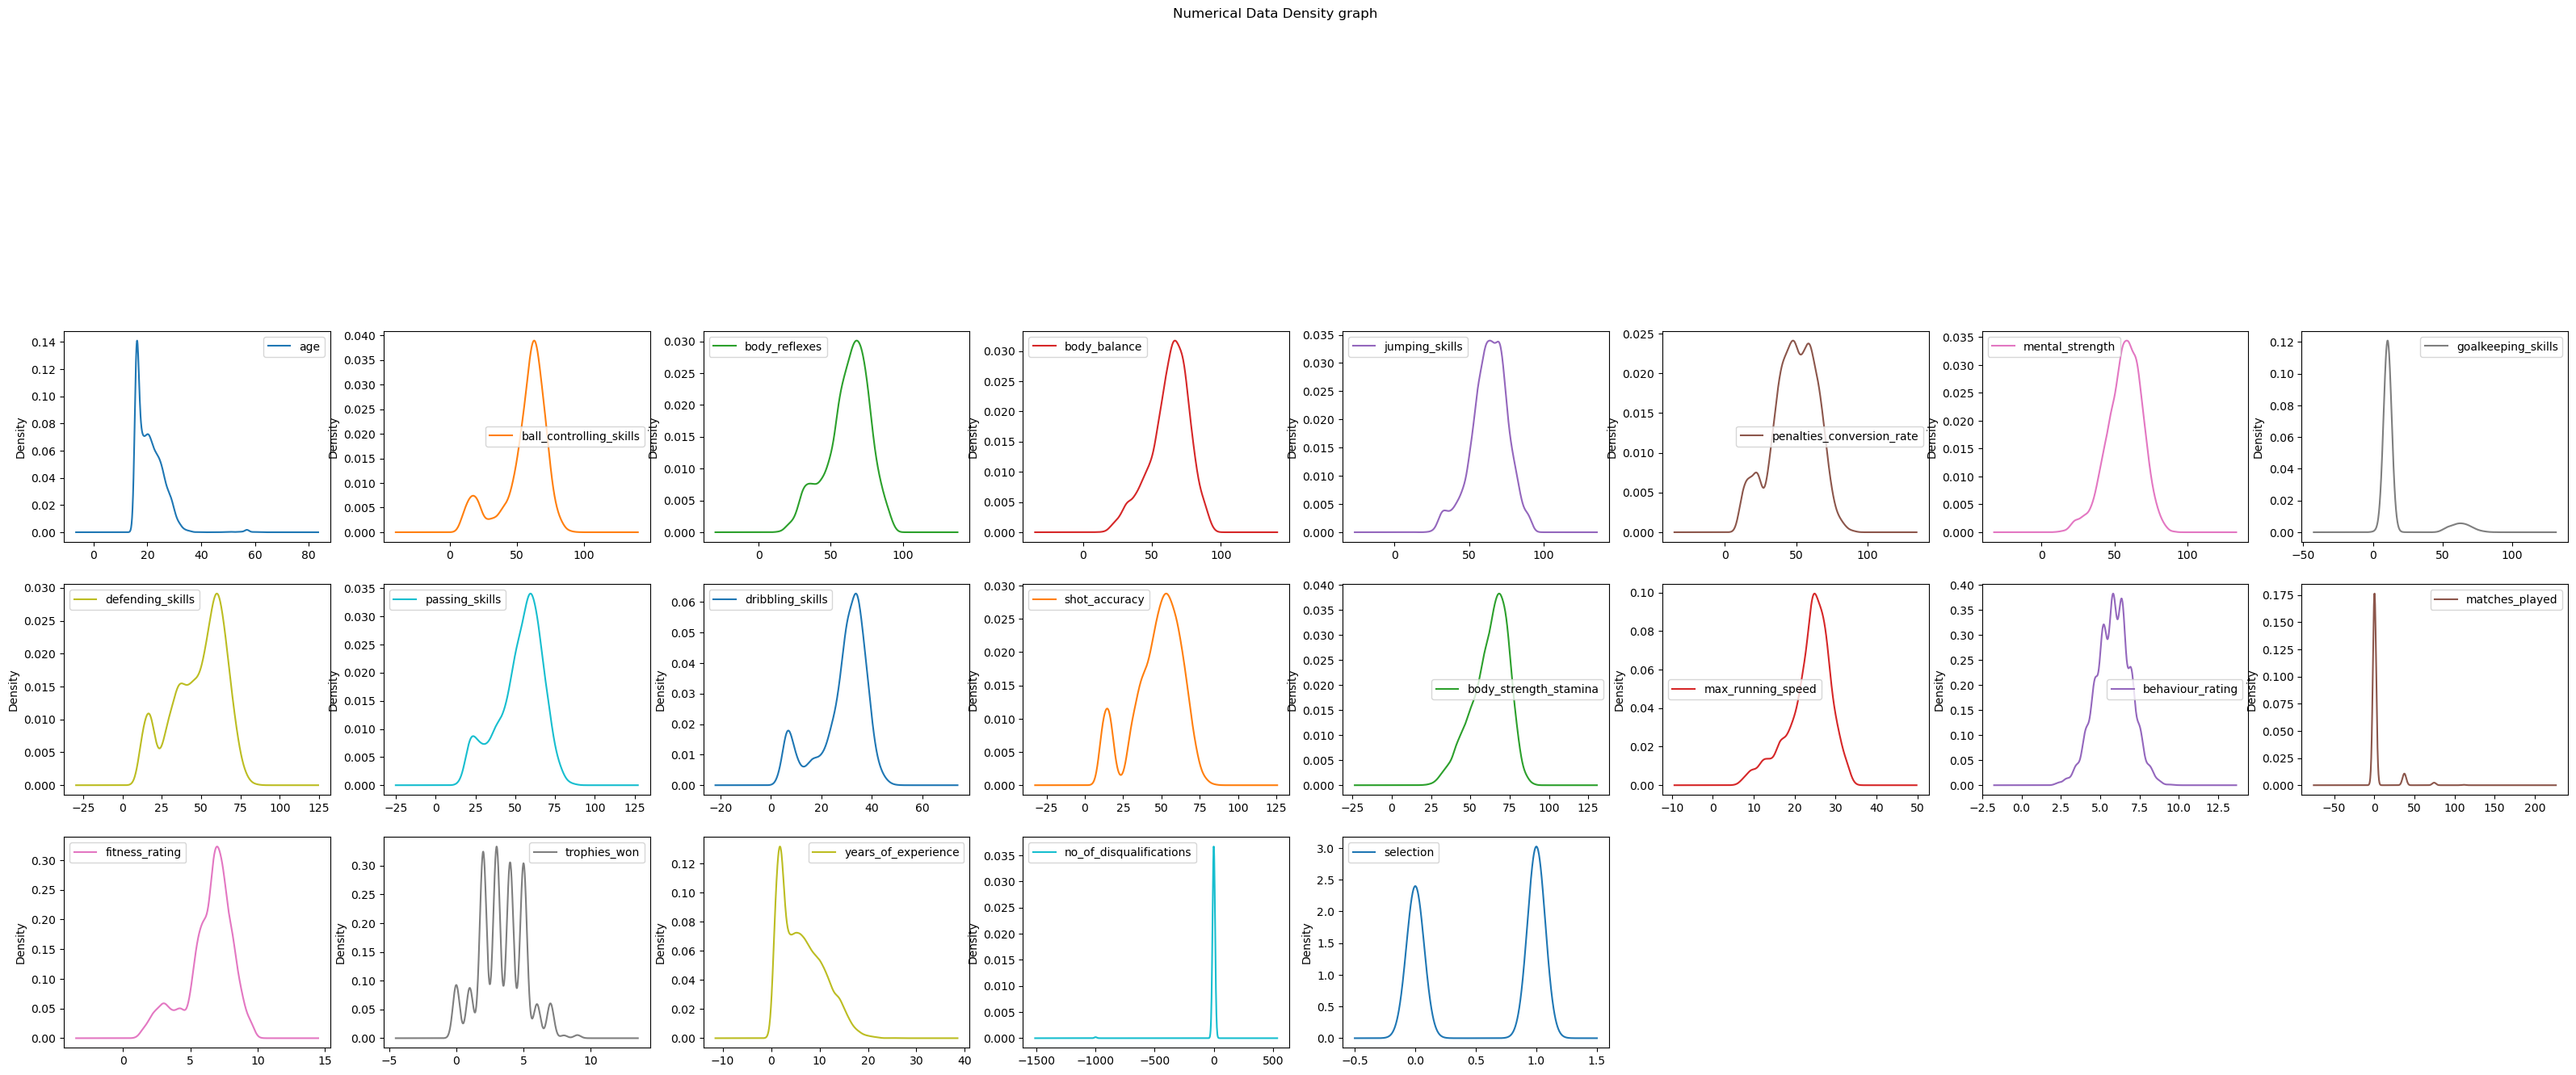

In [48]:
#Plotting density graph
numerical_data.plot(kind='density',subplots=True,figsize=(40,40),layout=(10,8),title='Numerical Data Density graph',sharex=False)

# Here below have dropped all the columns which had larger number of Null values and reducing the columns size so as to do the Minmax scaler,PCA,Label encoding etc

In [49]:
df=df.drop(['weight'],axis=1)

In [50]:
df.shape

(13994, 29)

In [51]:
df=df.drop(['ball_controlling_skills'],axis=1)

In [52]:
df.shape

(13994, 28)

In [53]:
df=df.drop(['shot_accuracy'],axis=1)

In [54]:
df.shape

(13994, 27)

In [55]:
df=df.drop(['behaviour_rating'],axis=1)

In [56]:
df.shape

(13994, 26)

In [57]:
df=df.drop(['strong_foot'],axis=1)

In [58]:
df.shape

(13994, 25)

In [59]:
df=df.drop(['matches_played'],axis=1)

In [60]:
df.shape

(13994, 24)

In [61]:
df=df.drop(['fitness_rating'],axis=1)

In [62]:
df.shape

(13994, 23)

In [23]:
df=df.drop(['coaching'],axis=1)

In [24]:
df.shape

(13994, 22)

In [63]:
df=df.drop(['years_of_experience'],axis=1)

In [64]:
df.shape

(13994, 22)

In [65]:
df.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height',
       'body_reflexes', 'body_balance', 'jumping_skills',
       'penalties_conversion_rate', 'mental_strength', 'goalkeeping_skills',
       'defending_skills', 'passing_skills', 'dribbling_skills',
       'body_strength_stamina', 'max_running_speed', 'trophies_won',
       'dedication_level', 'coaching', 'no_of_disqualifications', 'selection'],
      dtype='object')

In [66]:
df=df.drop(['player_id','name','country','height','dedication_level'],axis=1)

In [67]:
df.shape

(13994, 17)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        13994 non-null  int64  
 1   gender                     13975 non-null  object 
 2   body_reflexes              13994 non-null  float64
 3   body_balance               13994 non-null  float64
 4   jumping_skills             13970 non-null  float64
 5   penalties_conversion_rate  13964 non-null  float64
 6   mental_strength            13966 non-null  float64
 7   goalkeeping_skills         13994 non-null  float64
 8   defending_skills           13994 non-null  float64
 9   passing_skills             13994 non-null  float64
 10  dribbling_skills           13994 non-null  float64
 11  body_strength_stamina      13994 non-null  float64
 12  max_running_speed          13994 non-null  float64
 13  trophies_won               13994 non-null  flo

In [69]:
df.isnull().sum()

age                            0
gender                        19
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
body_strength_stamina          0
max_running_speed              0
trophies_won                   0
coaching                     125
no_of_disqualifications        0
selection                      0
dtype: int64

In [75]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df

,age,gender,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,dribbling_skills,body_strength_stamina,max_running_speed,trophies_won,coaching,no_of_disqualifications,selection
0,23,1,58.0,47.0,59.0,41.0,73.0,13.0,69.0,70.0,36.0,72.0,24.4,2.0,Talent Hunt,0.0,1
1,18,1,69.0,70.0,62.0,53.0,43.0,10.0,30.0,50.0,30.0,54.0,22.6,3.0,Source,0.0,0
2,16,0,43.0,45.0,69.0,49.0,45.0,10.0,57.0,37.0,18.0,66.0,23.2,5.0,Academy,0.0,1
3,27,1,73.0,76.0,86.0,81.0,80.0,3.0,85.0,80.0,40.0,78.0,21.2,6.0,Academy,16.0,1
4,19,0,61.0,74.0,57.0,49.0,35.0,9.0,60.0,39.0,34.0,56.0,23.4,5.0,Academy,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,20,1,48.0,62.0,60.0,40.0,61.0,10.0,63.0,58.0,30.0,66.0,18.9,2.0,Academy,0.0,1
13990,18,0,68.0,59.0,73.0,24.0,55.0,11.0,52.0,46.0,20.0,60.0,24.9,3.0,Academy,0.0,0
13991,17,1,73.0,62.0,50.0,47.0,64.0,10.0,58.0,56.0,28.0,72.0,28.5,3.0,Talent Hunt,0.0,1
13992,20,0,69.0,70.0,51.0,56.0,59.0,9.0,42.0,70.0,38.0,49.0,25.5,4.0,Academy,0.0,1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        13994 non-null  int64  
 1   gender                     13994 non-null  int32  
 2   body_reflexes              13994 non-null  float64
 3   body_balance               13994 non-null  float64
 4   jumping_skills             13970 non-null  float64
 5   penalties_conversion_rate  13964 non-null  float64
 6   mental_strength            13966 non-null  float64
 7   goalkeeping_skills         13994 non-null  float64
 8   defending_skills           13994 non-null  float64
 9   passing_skills             13994 non-null  float64
 10  dribbling_skills           13994 non-null  float64
 11  body_strength_stamina      13994 non-null  float64
 12  max_running_speed          13994 non-null  float64
 13  trophies_won               13994 non-null  flo

In [71]:
df.isnull().sum()

age                            0
gender                        19
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
body_strength_stamina          0
max_running_speed              0
trophies_won                   0
coaching                     125
no_of_disqualifications        0
selection                      0
dtype: int64

In [77]:
#Handling missing values
for i in ['gender','jumping_skills','penalties_conversion_rate','penalties_conversion_rate','mental_strength']:
    df[i]=df[i].fillna(df[i].median())
df

,age,gender,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,dribbling_skills,body_strength_stamina,max_running_speed,trophies_won,coaching,no_of_disqualifications,selection
0,23,1,58.0,47.0,59.0,41.0,73.0,13.0,69.0,70.0,36.0,72.0,24.4,2.0,Talent Hunt,0.0,1
1,18,1,69.0,70.0,62.0,53.0,43.0,10.0,30.0,50.0,30.0,54.0,22.6,3.0,Source,0.0,0
2,16,0,43.0,45.0,69.0,49.0,45.0,10.0,57.0,37.0,18.0,66.0,23.2,5.0,Academy,0.0,1
3,27,1,73.0,76.0,86.0,81.0,80.0,3.0,85.0,80.0,40.0,78.0,21.2,6.0,Academy,16.0,1
4,19,0,61.0,74.0,57.0,49.0,35.0,9.0,60.0,39.0,34.0,56.0,23.4,5.0,Academy,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,20,1,48.0,62.0,60.0,40.0,61.0,10.0,63.0,58.0,30.0,66.0,18.9,2.0,Academy,0.0,1
13990,18,0,68.0,59.0,73.0,24.0,55.0,11.0,52.0,46.0,20.0,60.0,24.9,3.0,Academy,0.0,0
13991,17,1,73.0,62.0,50.0,47.0,64.0,10.0,58.0,56.0,28.0,72.0,28.5,3.0,Talent Hunt,0.0,1
13992,20,0,69.0,70.0,51.0,56.0,59.0,9.0,42.0,70.0,38.0,49.0,25.5,4.0,Academy,0.0,1


In [79]:
#Outlier Detection
df.columns

Index(['age', 'gender', 'body_reflexes', 'body_balance', 'jumping_skills',
       'penalties_conversion_rate', 'mental_strength', 'goalkeeping_skills',
       'defending_skills', 'passing_skills', 'dribbling_skills',
       'body_strength_stamina', 'max_running_speed', 'trophies_won',
       'coaching', 'no_of_disqualifications', 'selection'],
      dtype='object')

In [80]:
df.shape

(13994, 17)

In [81]:
#Z-score method
def find_outliers_zscore(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    return z_scores > threshold

In [86]:
outliers_all_columns = df.drop(columns=['coaching']).apply(find_outliers_zscore)



In [87]:
outliers_rows = outliers_all_columns.any(axis=1)
outliers_detected = df[outliers_rows]

In [88]:
potential_outliers_index = outliers_detected.index

In [89]:
potential_outliers_index

Int64Index([   32,    57,    58,    75,    79,    86,   122,   130,   133,
              176,
            ...
            13811, 13832, 13905, 13906, 13920, 13933, 13945, 13954, 13964,
            13969],
           dtype='int64', length=832)

In [90]:
df_new = df.drop(index=potential_outliers_index)

In [92]:
df_new

,age,gender,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,dribbling_skills,body_strength_stamina,max_running_speed,trophies_won,coaching,no_of_disqualifications,selection
0,23,1,58.0,47.0,59.0,41.0,73.0,13.0,69.0,70.0,36.0,72.0,24.4,2.0,Talent Hunt,0.0,1
1,18,1,69.0,70.0,62.0,53.0,43.0,10.0,30.0,50.0,30.0,54.0,22.6,3.0,Source,0.0,0
2,16,0,43.0,45.0,69.0,49.0,45.0,10.0,57.0,37.0,18.0,66.0,23.2,5.0,Academy,0.0,1
3,27,1,73.0,76.0,86.0,81.0,80.0,3.0,85.0,80.0,40.0,78.0,21.2,6.0,Academy,16.0,1
4,19,0,61.0,74.0,57.0,49.0,35.0,9.0,60.0,39.0,34.0,56.0,23.4,5.0,Academy,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,20,1,48.0,62.0,60.0,40.0,61.0,10.0,63.0,58.0,30.0,66.0,18.9,2.0,Academy,0.0,1
13990,18,0,68.0,59.0,73.0,24.0,55.0,11.0,52.0,46.0,20.0,60.0,24.9,3.0,Academy,0.0,0
13991,17,1,73.0,62.0,50.0,47.0,64.0,10.0,58.0,56.0,28.0,72.0,28.5,3.0,Talent Hunt,0.0,1
13992,20,0,69.0,70.0,51.0,56.0,59.0,9.0,42.0,70.0,38.0,49.0,25.5,4.0,Academy,0.0,1


In [93]:
df_new.reset_index(drop=True, inplace=True)

In [94]:
df_new

,age,gender,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,dribbling_skills,body_strength_stamina,max_running_speed,trophies_won,coaching,no_of_disqualifications,selection
0,23,1,58.0,47.0,59.0,41.0,73.0,13.0,69.0,70.0,36.0,72.0,24.4,2.0,Talent Hunt,0.0,1
1,18,1,69.0,70.0,62.0,53.0,43.0,10.0,30.0,50.0,30.0,54.0,22.6,3.0,Source,0.0,0
2,16,0,43.0,45.0,69.0,49.0,45.0,10.0,57.0,37.0,18.0,66.0,23.2,5.0,Academy,0.0,1
3,27,1,73.0,76.0,86.0,81.0,80.0,3.0,85.0,80.0,40.0,78.0,21.2,6.0,Academy,16.0,1
4,19,0,61.0,74.0,57.0,49.0,35.0,9.0,60.0,39.0,34.0,56.0,23.4,5.0,Academy,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13157,20,1,48.0,62.0,60.0,40.0,61.0,10.0,63.0,58.0,30.0,66.0,18.9,2.0,Academy,0.0,1
13158,18,0,68.0,59.0,73.0,24.0,55.0,11.0,52.0,46.0,20.0,60.0,24.9,3.0,Academy,0.0,0
13159,17,1,73.0,62.0,50.0,47.0,64.0,10.0,58.0,56.0,28.0,72.0,28.5,3.0,Talent Hunt,0.0,1
13160,20,0,69.0,70.0,51.0,56.0,59.0,9.0,42.0,70.0,38.0,49.0,25.5,4.0,Academy,0.0,1


In [95]:
#Label Encoding
#Here again encoded the coaching column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new['coaching'] = le.fit_transform(df_new['coaching'])

In [96]:
df_new

,age,gender,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,dribbling_skills,body_strength_stamina,max_running_speed,trophies_won,coaching,no_of_disqualifications,selection
0,23,1,58.0,47.0,59.0,41.0,73.0,13.0,69.0,70.0,36.0,72.0,24.4,2.0,2,0.0,1
1,18,1,69.0,70.0,62.0,53.0,43.0,10.0,30.0,50.0,30.0,54.0,22.6,3.0,1,0.0,0
2,16,0,43.0,45.0,69.0,49.0,45.0,10.0,57.0,37.0,18.0,66.0,23.2,5.0,0,0.0,1
3,27,1,73.0,76.0,86.0,81.0,80.0,3.0,85.0,80.0,40.0,78.0,21.2,6.0,0,16.0,1
4,19,0,61.0,74.0,57.0,49.0,35.0,9.0,60.0,39.0,34.0,56.0,23.4,5.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13157,20,1,48.0,62.0,60.0,40.0,61.0,10.0,63.0,58.0,30.0,66.0,18.9,2.0,0,0.0,1
13158,18,0,68.0,59.0,73.0,24.0,55.0,11.0,52.0,46.0,20.0,60.0,24.9,3.0,0,0.0,0
13159,17,1,73.0,62.0,50.0,47.0,64.0,10.0,58.0,56.0,28.0,72.0,28.5,3.0,2,0.0,1
13160,20,0,69.0,70.0,51.0,56.0,59.0,9.0,42.0,70.0,38.0,49.0,25.5,4.0,0,0.0,1


In [97]:
#Min Max Scaling
x = df_new.drop('selection',axis=1)

In [98]:
y = df_new['selection']

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()

,age,gender,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,dribbling_skills,body_strength_stamina,max_running_speed,trophies_won,coaching,no_of_disqualifications
0,0.35,0.5,0.513,0.342,0.463,0.400,0.732,0.182,0.779,0.747,0.708,0.683,0.604,0.250,0.50,0.000
1,0.10,0.5,0.654,0.645,0.507,0.541,0.310,0.136,0.273,0.480,0.583,0.397,0.537,0.375,0.25,0.000
2,0.00,0.0,0.321,0.316,0.612,0.494,0.338,0.136,0.623,0.307,0.333,0.587,0.560,0.625,0.00,0.000
3,0.55,0.5,0.705,0.724,0.866,0.871,0.831,0.030,0.987,0.880,0.792,0.778,0.485,0.750,0.00,0.667
4,0.15,0.0,0.551,0.697,0.433,0.494,0.197,0.121,0.662,0.333,0.667,0.429,0.567,0.625,0.00,0.000


In [101]:
x_scaled.columns

Index(['age', 'gender', 'body_reflexes', 'body_balance', 'jumping_skills',
       'penalties_conversion_rate', 'mental_strength', 'goalkeeping_skills',
       'defending_skills', 'passing_skills', 'dribbling_skills',
       'body_strength_stamina', 'max_running_speed', 'trophies_won',
       'coaching', 'no_of_disqualifications'],
      dtype='object')

In [102]:
#PCA
# First import the library
from sklearn.decomposition import PCA

In [103]:
pca=PCA(n_components=0.97)
pca.fit(x_scaled)

PCA(n_components=0.97)

In [104]:
x_pca=pca.transform(x_scaled)

In [105]:
x_pca.shape

(13162, 12)

In [106]:
x_pca=pd.DataFrame(x_pca)

In [107]:
x_pca.columns

RangeIndex(start=0, stop=12, step=1)

In [108]:
df_new.columns

Index(['age', 'gender', 'body_reflexes', 'body_balance', 'jumping_skills',
       'penalties_conversion_rate', 'mental_strength', 'goalkeeping_skills',
       'defending_skills', 'passing_skills', 'dribbling_skills',
       'body_strength_stamina', 'max_running_speed', 'trophies_won',
       'coaching', 'no_of_disqualifications', 'selection'],
      dtype='object')

In [121]:
original_cols=['layer_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection']
# Mapping indices to column names
pca_column_names = [original_cols[i] for i in range(len(x_pca.columns))]

# Display the PCA column names
print(pca_column_names)


['layer_id', 'name', 'age', 'gender', 'country', 'height', 'weight', 'ball_controlling_skills', 'body_reflexes', 'body_balance', 'jumping_skills', 'penalties_conversion_rate']


In [122]:
#Train Test split
from sklearn.model_selection import train_test_split

In [123]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

# Different Modelling

In [124]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [125]:
# Train the Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [126]:
# Make predictions on the test set
lr_y_pred = lr_model.predict(x_test)

In [127]:
# Evaluate the model
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, lr_y_pred))
print(classification_report(y_test, lr_y_pred))

Logistic Regression:
Accuracy: 0.7637675655146221
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1135
           1       0.79      0.80      0.79      1498

    accuracy                           0.76      2633
   macro avg       0.76      0.76      0.76      2633
weighted avg       0.76      0.76      0.76      2633



In [128]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier

In [129]:
metric_k=[]
neighbors=np.arange(3,15)

In [130]:
for k in neighbors:
  knn_model=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  knn_model.fit(x_train,y_train)
  knn_y_pred=knn_model.predict(x_test)
  acc=accuracy_score(y_test,knn_y_pred)
  metric_k.append(acc)

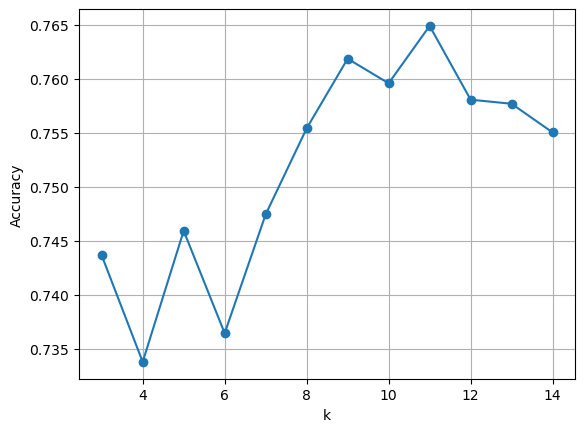

In [131]:
# Plotting a graph
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

In [132]:
# Creating a knn model for 11 neighbors
knn_model=KNeighborsClassifier(n_neighbors=11,metric='euclidean')
knn_model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [133]:
knn_y_pred=knn_model.predict(x_test)

In [134]:
print("KNN Model:")
print("Accuracy:", accuracy_score(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred))

KNN Model:
Accuracy: 0.7649069502468667
              precision    recall  f1-score   support

           0       0.73      0.72      0.73      1135
           1       0.79      0.80      0.79      1498

    accuracy                           0.76      2633
   macro avg       0.76      0.76      0.76      2633
weighted avg       0.76      0.76      0.76      2633



In [135]:
#SVM Model
from sklearn.svm import SVC
svm_model=SVC(kernel='linear')
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [136]:
svm_y_pred=svm_model.predict(x_test)

In [137]:
print("SVM Model:")
print("Accuracy:", accuracy_score(y_test, svm_y_pred))
print(classification_report(y_test, svm_y_pred))

SVM Model:
Accuracy: 0.7611090011393847
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1135
           1       0.79      0.79      0.79      1498

    accuracy                           0.76      2633
   macro avg       0.76      0.76      0.76      2633
weighted avg       0.76      0.76      0.76      2633



# Considering the KNN model accuracy

In [138]:
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

In [139]:
param_dist = {
    'n_neighbors': range(3, 15),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [140]:
random_search = RandomizedSearchCV(
    knn_model,
    param_distributions=param_dist,
    n_iter=10,  
    cv=2,       
    random_state=42
)

random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=2,
                   estimator=KNeighborsClassifier(metric='euclidean',
                                                  n_neighbors=11),
                   param_distributions={'n_neighbors': range(3, 15),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42)

In [141]:
print("The Best parameters:", random_search.best_params_)

The Best parameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 13}


In [142]:
best_knn = random_search.best_estimator_

predictions = best_knn.predict(x_test)

In [143]:
print("Randomsearch Model:")
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Randomsearch Model:
Accuracy: 0.761488796050133
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      1135
           1       0.79      0.79      0.79      1498

    accuracy                           0.76      2633
   macro avg       0.76      0.76      0.76      2633
weighted avg       0.76      0.76      0.76      2633



In [144]:
#Here also the accuracy is 0.761 which is approximately equal to KNN model


In [145]:
import pickle

In [146]:
pickle.dump(knn_model,open('knn_model.pkl','wb'))

# However all the EDA steps,preprocessing,modelling-LogisticRegression,KNN & SVM models are done in which all are having similar accuracy however KNN model is considered.Fine tuning is also done which is having accuracy similar to KNN model.Then imported the pickel library.